# setup

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
TYPE_FLOAT = np.float32

# Data

[7.1.3. Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

> Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.
>  
> Note: Each of these 10 feature variables have been **mean centered and scaled** by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).
> 
> **y** is a quantitative measure of disease progression one year after baseline

1. age age in years
2. sex
3. bmi body mass index
4. bp average blood pressure
5. s1 tc, total serum cholesterol
6. s2 ldl, low-density lipoproteins
7. s3 hdl, high-density lipoproteins
8. s4 tch, total cholesterol / HDL
9. s5 ltg, possibly log of serum triglycerides level
10. s6 glu, blood sugar level


In [3]:
X, y = load_diabetes(return_X_y=True)
print(f"X shape {X.shape} y shape {y.shape}")

X shape (442, 10) y shape (442,)


In [4]:
df = pd.DataFrame(X)
df.columns = ['age', 'gender', 'bmi', 'pressure', 'cholesterol', 's2', 's3', 's4', 's5', 's6']
df.head(5)

,age,gender,bmi,pressure,cholesterol,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


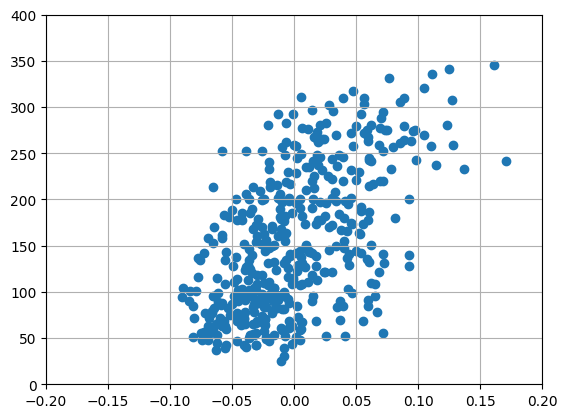

In [5]:
X_age = X[:, 0]
X_sex = X[:, 1]
X_bmi = X[:, 2]
plt.scatter(X_bmi, y)
plt.xlim(-0.2, 0.2)
plt.ylim(0, 400)
plt.grid()

In [6]:
X = X_bmi
X = np.c_[
    np.ones(X.shape[0], dtype=TYPE_FLOAT),  # Add bias x0
    X.astype(TYPE_FLOAT)
]
y = y.reshape((-1, 1))


X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]


print(f"X_train shape: {X_train.shape}, y_train shape {y_train.shape}")

X_train shape: (422, 2), y_train shape (422, 1)


# Parameters

In [7]:
N = len(X_train)
D = 2     # (Bias, BMI)
M = 1     # Number of node
LR = 0.1  # Learning rate

## Weights

In [8]:
W = np.random.randn(D).reshape((M, D))
W.shape

(1, 2)

---
# Regression

<img src="./linear_regression/gradient_descent.jpg" align="left"/>

In [9]:
def mse(y_predict, y) -> np.ndarray:
    assert len(y_predict) == len(y)
    return np.sum((y - y_predict)**2 / 2 / len(y_predict))

In [10]:
def predict(X, W):
    return np.matmul(X, W.T)

In [11]:
y_predict = predict(X_train, W)
y_predict.shape

(422, 1)

In [12]:
loss = mse(y_predict, y_train)
loss

14616.099473247177

In [13]:
def gradient(X, y_predict, y):
    return np.einsum("dn,nm->md", X.T, (y_predict - y)) / len(X)
    

In [14]:
dw = gradient(X=X_train, y_predict=y_predict, y=y_train)

In [26]:
def gradient_descent(W, X_train, y_train, lr=LR, epoch=10000):
    for i in range(epoch):
        y_predict = predict(X_train, W)
        loss = mse(y_predict, y_train)
        # print(f"loss {loss}")
        
        dW = gradient(X=X_train, y_predict=y_predict, y=y_train)
        W = W - lr * dW
    
    return W

In [39]:
W_result = gradient_descent(W, X_train, y_train, lr=0.3)

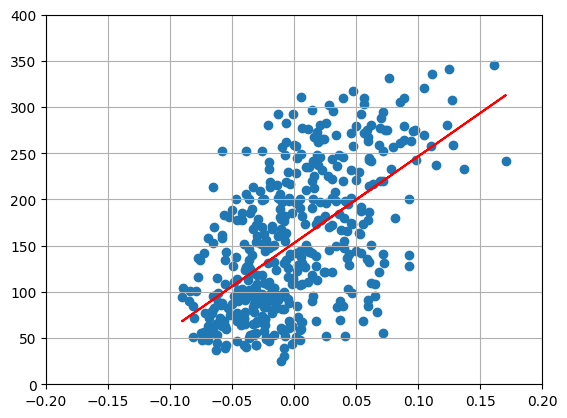

In [45]:
plt.scatter(X_bmi, y)
plt.plot(X_train[:, 1], predict(W=W_result, X=X_train), color='r')
plt.xlim(-0.2, 0.2)
plt.ylim(0, 400)
plt.grid()

# Scikit Learn LinearRegression

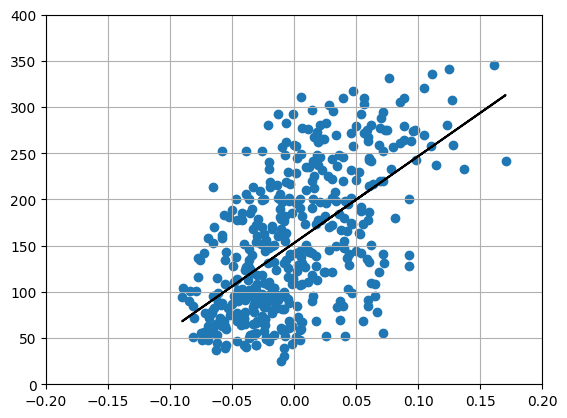

In [47]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

_X_train = X_train[:, 1].reshape((-1, 1))
reg.fit(_X_train, y_train)

plt.scatter(X_bmi, y)
plt.plot(_X_train[:, 0], reg.predict(_X_train), color="k")
plt.xlim(-0.2, 0.2)
plt.ylim(0, 400)
plt.grid()